We are importing a Kegel data set about the crime records in ireland from 2003 to 2019 to clean an analize it an create some insights with the info generated. 

In [2]:
%pip install pandas
import pandas as pd

data = pd.read_csv('dataset/IRELAND_CRIME_2003-2019.csv')

print(data.head())



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
            REGION  GARDA DIVISION  OFFENCE CODE  \
0  NORTHERN REGION  CAVAN/MONAGHAN           111   
1  NORTHERN REGION  CAVAN/MONAGHAN           112   
2  NORTHERN REGION  CAVAN/MONAGHAN           113   
3  NORTHERN REGION  CAVAN/MONAGHAN            12   
4  NORTHERN REGION  CAVAN/MONAGHAN            21   

                              OFFENCE    TYPE OF OFFENCE  2003Q1  2003Q2  \
0                              Murder  HOMICIDE OFFENCES       0       0   
1                        Manslaughter  HOMICIDE OFFENCES       0       0   
2                         Infanticide  HOMICIDE OFFENCES       0       0   
3  Dangerous driving leading to death  HOMICIDE OFFENCES       1       0   
4             Rape and sexual assault    SEXUAL OFFENCES      24      15   

   2003Q3  2003Q4  2004Q1  ...  2017Q2  2017Q3  201

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   REGION           1624 non-null   object
 1   GARDA DIVISION   1624 non-null   object
 2   OFFENCE CODE     1624 non-null   int64 
 3   OFFENCE          1624 non-null   object
 4   TYPE OF OFFENCE  1624 non-null   object
 5   2003Q1           1624 non-null   int64 
 6   2003Q2           1624 non-null   int64 
 7   2003Q3           1624 non-null   int64 
 8   2003Q4           1624 non-null   int64 
 9   2004Q1           1624 non-null   int64 
 10  2004Q2           1624 non-null   int64 
 11  2004Q3           1624 non-null   int64 
 12  2004Q4           1624 non-null   int64 
 13  2005Q1           1624 non-null   int64 
 14  2005Q2           1624 non-null   int64 
 15  2005Q3           1624 non-null   int64 
 16  2005Q4           1624 non-null   int64 
 17  2006Q1           1624 non-null   

In [4]:
print(data.shape)

(1624, 72)


In [5]:
### I decided to rename most of the columns to avoid blank spaces and make te whole process easier. Also to have more readabilty while working with it, and with data.isnull, we get to check whether we will need to clean more or else. 


In [6]:
renameDict = {
    'REGION' : 'reqion',
    'GARDA DIVISION' : 'garda_division',
    'OFFENCE CODE' : 'offece_code',
    'OFFENCE' : 'offence',
    'TYPE OF OFFENCE' : 'type_of_offence',
    '2003Q1' : 'Q1_2003',
    '2003Q2' : 'Q2_2003',
    '2003Q3' : 'Q3_2003',
    '2003Q4' : 'Q4_2003',
    '2004Q1' : 'Q1_2004',
    '2004Q2' : 'Q2_2004',
    '2004Q3' : 'Q3_2004',
    '2004Q4' : 'Q4_2004',
    '2005Q1' : 'Q1_2005',
    '2005Q2' : 'Q2_2005',
    '2005Q3' : 'Q3_2005',
    '2005Q4' : 'Q4_2005',
    '2006Q1' : 'Q1_2006',
    '2006Q2' : 'Q2_2006',
    '2006Q3' : 'Q3_2006',
    '2006Q4' : 'Q4_2006',
    '2007Q1' : 'Q1_2007',
    '2007Q2' : 'Q2_2007',
    '2007Q3' : 'Q3_2007',
    '2007Q4' : 'Q4_2007',
    '2008Q1' : 'Q1_2008',
    '2008Q2' : 'Q2_2008',
    '2008Q3' : 'Q3_2008',
    '2008Q4' : 'Q4_2008',
    '2009Q1' : 'Q1_2009',
    '2009Q2' : 'Q2_2009',
    '2009Q3' : 'Q3_2009',
    '2009Q4' : 'Q4_2009',
    '2010Q1' : 'Q1_2010',
    '2010Q2' : 'Q2_2010',
    '2010Q3' : 'Q3_2010',
    '2010Q4' : 'Q4_2010',
    '2011Q1' : 'Q1_2011',
    '2011Q2' : 'Q2_2011',
    '2011Q3' : 'Q3_2011',
    '2011Q4' : 'Q4_2011',
    '2012Q1' : 'Q1_2012',
    '2012Q2' : 'Q2_2012',
    '2012Q3' : 'Q3_2012',
    '2012Q4' : 'Q4_2012',
    '2013Q1' : 'Q1_2013',
    '2013Q2' : 'Q2_2013',
    '2013Q3' : 'Q3_2013',
    '2013Q4' : 'Q4_2013',
    '2014Q1' : 'Q1_2014',
    '2014Q2' : 'Q2_2014',
    '2014Q3' : 'Q3_2014',
    '2014Q4' : 'Q4_2014',
    '2015Q1' : 'Q1_2015',
    '2015Q2' : 'Q2_2015',
    '2015Q3' : 'Q3_2015',
    '2015Q4' : 'Q4_2015',
    '2016Q1' : 'Q1_2016',
    '2016Q2' : 'Q2_2016',
    '2016Q3' : 'Q3_2016',
    '2016Q4' : 'Q4_2016',
    '2017Q1' : 'Q1_2017',
    '2017Q2' : 'Q2_2017',
    '2017Q3' : 'Q3_2017',
    '2017Q4' : 'Q4_2017',
    '2018Q1' : 'Q1_2018',
    '2018Q2' : 'Q2_2018',
    '2018Q3' : 'Q3_2018',
    '2018Q4' : 'Q4_2018',
    '2019Q1' : 'Q1_2019',
    '2019Q2' : 'Q2_2019',
    '2019Q3' : 'Q3_2019'
}
data.rename(renameDict, axis=1, inplace=True)

In [7]:
data.isnull()

,reqion,garda_division,offece_code,offence,type_of_offence,Q1_2003,Q2_2003,Q3_2003,Q4_2003,Q1_2004,...,Q2_2017,Q3_2017,Q4_2017,Q1_2018,Q2_2018,Q3_2018,Q4_2018,Q1_2019,Q2_2019,Q3_2019
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1620,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1621,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1622,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
from collections import defaultdict 

quarters = [column for column in data.columns if column.startswith('Q')]
year_quarter = defaultdict(list)
for column in quarters:
    year = column.split('_')[1]
    year_quarter[year].append(column)
for year, quarters in year_quarter.items():
    data[f'Total_{year}'] = data[quarters].sum(axis=1)


In [9]:
data['garda_division'] = data['garda_division'].replace({
    'CORK CITY': 'CORK',
    'CORK NORTH': 'CORK',
    'CORK WEST': 'CORK',
    'D.M.R. EASTERN': 'DUBLIN',
    'D.M.R. SOUTHERN': 'DUBLIN',
    'D.M.R. NORTHERN': 'DUBLIN',
    'D.M.R. WESTERN': 'DUBLIN',
    'D.M.R. NORTH CENTRAL':'DUBLIN',
    'D.M.R. SOUTH CENTRAL': 'DUBLIN'
})

group_cols = ['reqion', 'garda_division', 'offece_code', 'offence', 'type_of_offence']

grouped_data = data.groupby(group_cols, as_index=False).sum()

In [10]:
%pip install matplotlib

import matplotlib
import matplotlib.pyplot as plt
import numpy as np



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


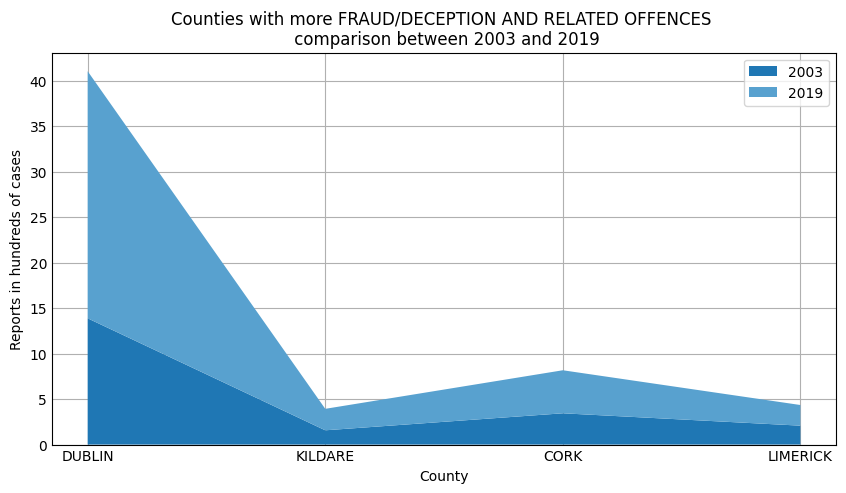

<Figure size 200x200 with 0 Axes>

In [29]:
fraud_set = grouped_data[grouped_data['type_of_offence'] == 'FRAUD/DECEPTION AND RELATED OFFENCES']
fraud_set = fraud_set[fraud_set['Total_2003'] > 150]
plt.style.use('_mpl-gallery')


x = fraud_set['garda_division']
y = np.vstack([fraud_set['Total_2003']/100, fraud_set['Total_2019']/100])
fig, ax = plt.subplots()
ax.stackplot(x,y)
fig.set_size_inches(8, 4)
ax.set_title('Counties with more FRAUD/DECEPTION AND RELATED OFFENCES \n comparison between 2003 and 2019')
plt.legend(['2003', '2019'])
plt.xlabel('County')
plt.ylabel('Reports in hundreds of cases')

plt.show()
plt. savefig('./plots/fraud.png', dpi=300, bbox_inches='tight')

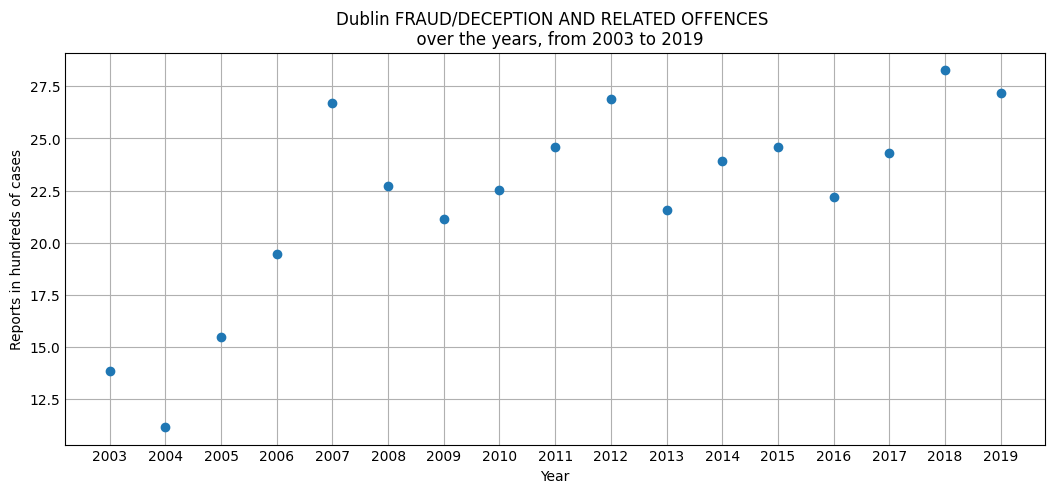

In [16]:
dublin_fraud = fraud_set[fraud_set['garda_division'] == 'DUBLIN']
plt.style.use('_mpl-gallery')

columns = [column for column in dublin_fraud.columns if column.startswith('Total_')]
x = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

y = dublin_fraud[columns].values.flatten()/100
fig, ax = plt.subplots()
ax.scatter(x, y)
fig.set_size_inches(10, 4)

ax.set_title('Dublin FRAUD/DECEPTION AND RELATED OFFENCES \n  over the years, from 2003 to 2019')
plt.xlabel('Year')
plt.ylabel('Reports in hundreds of cases')
plt. savefig('./plots/dublin-fraud-2003-2019.png', dpi=300, bbox_inches='tight')
plt.show()


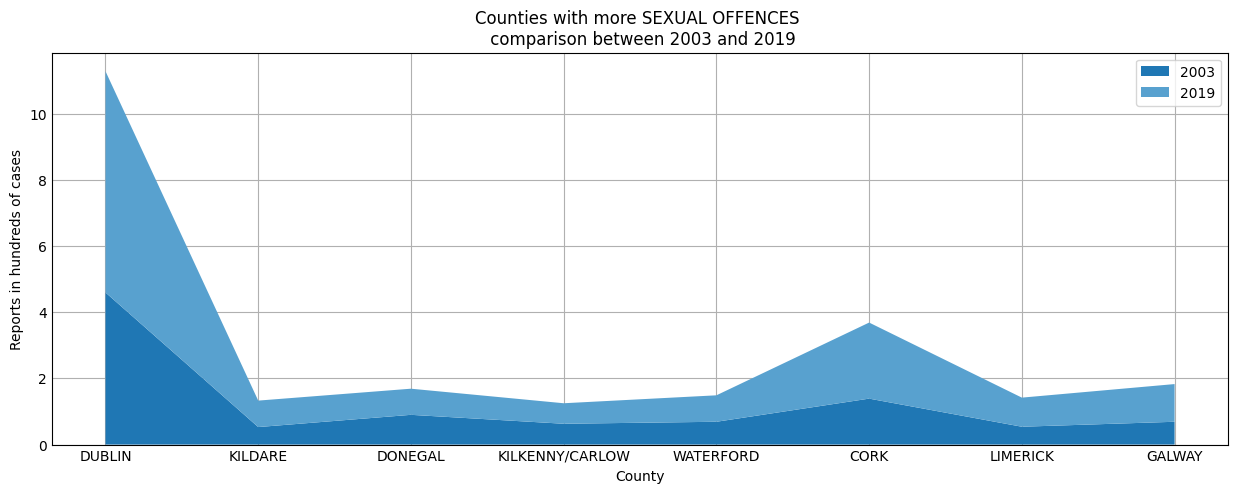

<Figure size 200x200 with 0 Axes>

In [30]:
sexual_offece = grouped_data[grouped_data['offence'] == 'Rape and sexual assault']
sexual_offece = sexual_offece[sexual_offece['Total_2003'] > 50]
plt.style.use('_mpl-gallery')


x = sexual_offece['garda_division']
y = np.vstack([sexual_offece['Total_2003']/100, sexual_offece['Total_2019']/100])
fig, ax = plt.subplots()
ax.stackplot(x,y)
fig.set_size_inches(12, 4)
ax.set_title('Counties with more SEXUAL OFFENCES \n comparison between 2003 and 2019')
plt.legend(['2003', '2019'])
plt.xlabel('County')
plt.ylabel('Reports in hundreds of cases')

plt.show()
plt. savefig('./plots/sexual-offence.png', dpi=300, bbox_inches='tight')